## 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

## 參考資料

[Clustering：Statistical Learning YT - StatsLearning Lect12c 111113](https://www.youtube.com/watch?v=aIybuNt9ps4)

[Clustering Means Algorithm：Lecture 13.2 — Clustering | KMeans Algorithm — \[Machine Learning | Andrew Ng\]](https://www.youtube.com/watch?v=hDmNF9JG3lo)

[Unsupervised Machine Learning: Flat Clustering - K-Means clusternig example with Python and Scikit-learn](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('X:\n', X[:10])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

y:
 [0 0 0 0 0 0 0 0 0 0]

unique y:
 [0 1 2]


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

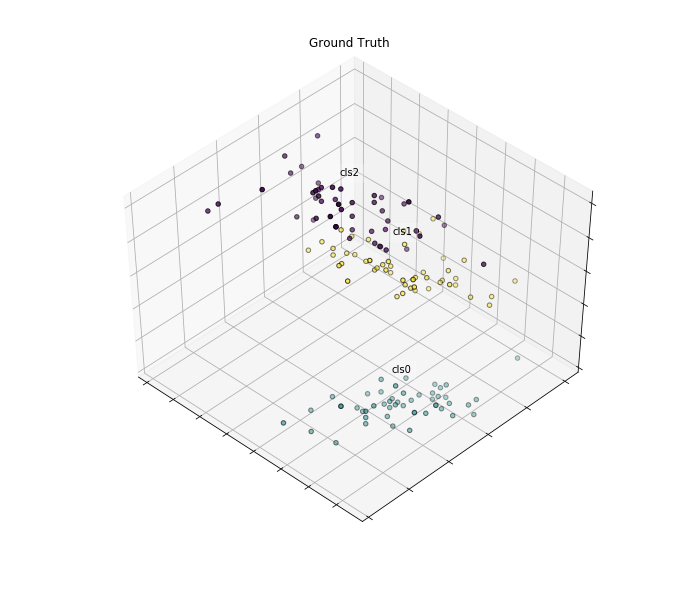

In [3]:
fignum = 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 8,))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('cls0', 0,), ('cls1', 1,), ('cls2', 2,)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean(), X[y == label, 3].mean() + 0.5, name,
              horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=np.choose(y, [1, 2, 0]).astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

In [4]:
def show_result(titles, estimators):
    fig = plt.figure(figsize=(18, 5,))
    nrows, ncols, fignum = 1, len(titles), 1
    for name, est in estimators:
        est.fit(X)
        
        ax = fig.add_subplot(nrows, ncols, fignum, projection='3d')
        ax.view_init(elev=48, azim=134)
        ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=est.labels_.astype(np.float), edgecolor='k')
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_title(titles[fignum - 1])
        ax.dist = 12
        fignum = fignum + 1

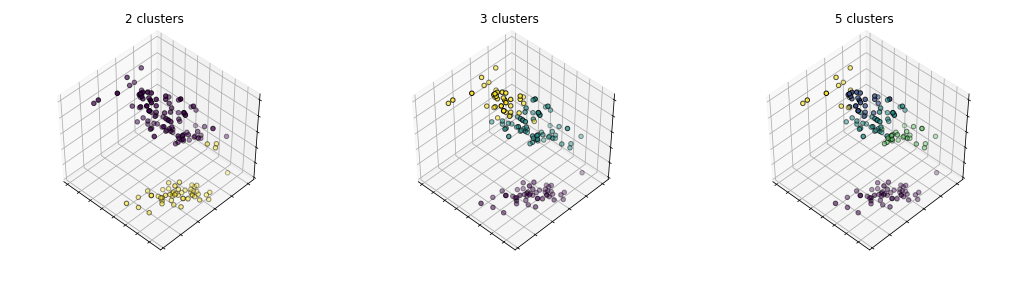

In [5]:
titles = ['2 clusters', '3 clusters', '5 clusters']
estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_5', KMeans(n_clusters=5))]
show_result(titles, estimators)

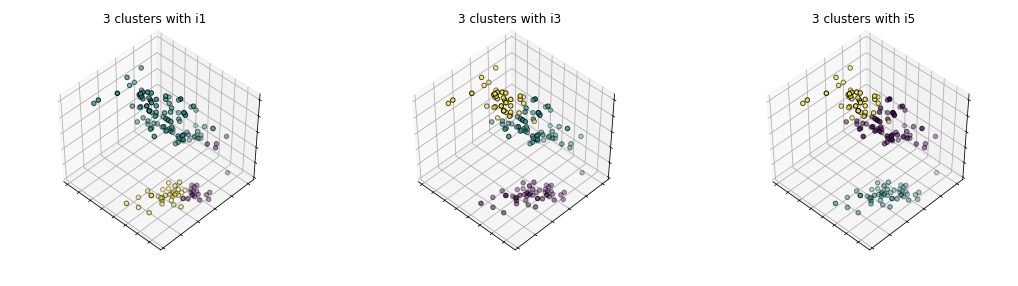

In [6]:
titles = ['3 clusters with i1', '3 clusters with i3', '3 clusters with i5']
estimators = [('k_means_3_i1', KMeans(n_clusters=3, n_init=1)),
              ('k_means_3_i3', KMeans(n_clusters=3, n_init=3)),
              ('k_means_3_i5', KMeans(n_clusters=3, n_init=5))]
show_result(titles, estimators)

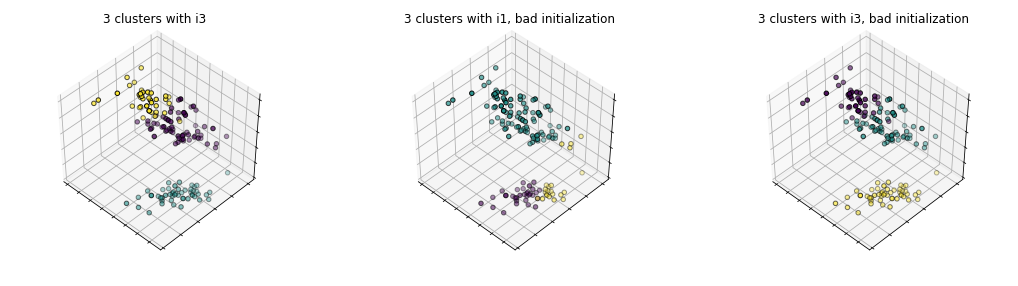

In [7]:
titles = ['3 clusters with i3', '3 clusters with i1, bad initialization', '3 clusters with i3, bad initialization']
estimators = [('k_means_3_i1', KMeans(n_clusters=3, n_init=3)),
              ('k_means_3_i3', KMeans(n_clusters=3, n_init=1, init='random')),
              ('k_means_3_i5', KMeans(n_clusters=3, n_init=3, init='random'))]
show_result(titles, estimators)